<a href="https://colab.research.google.com/github/LazyHooks/AI_Jobs_Disruption/blob/main/MM_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports

In [36]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

warning override

In [37]:
import warnings

warnings.filterwarnings('ignore')

input

In [38]:
df = pd.read_csv("MM_aug.csv")

exploratory

In [39]:
df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Knowledge        717 non-null    int64
 1   Problem Solving  717 non-null    int64
 2   Interaction      717 non-null    int64
 3   Impact           717 non-null    int64
 4   Accountability   717 non-null    int64
dtypes: int64(5)
memory usage: 28.1 KB


In [40]:
df.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,181,48,52,90,0
1,75,48,27,64,0
2,148,48,84,64,0
3,52,36,27,90,0
4,52,36,27,90,0


checks

In [41]:
df.isnull().sum()
df.describe()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,140.451883,54.937238,56.771269,119.507671,30.913529
std,59.120646,17.183294,23.367016,34.336391,17.380021
min,52.000000,36.000000,27.000000,55.000000,0.000000
25%,75.000000,48.000000,36.000000,90.000000,21.000000
50%,148.000000,48.000000,66.000000,116.000000,35.000000
75%,181.000000,65.000000,84.000000,142.000000,42.000000
max,300.000000,117.000000,125.000000,242.000000,75.000000


In [42]:
X=df

Scaling

In [43]:
cols = X.columns

In [44]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [45]:
X = pd.DataFrame(X, columns=[cols])

In [46]:
X.head()

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.520161,0.148148,0.255102,0.187166,0.0
1,0.092742,0.148148,0.000000,0.048128,0.0
2,0.387097,0.148148,0.581633,0.048128,0.0
3,0.000000,0.000000,0.000000,0.187166,0.0
4,0.000000,0.000000,0.000000,0.187166,0.0


In [47]:
X.dropna(inplace=True)
X

,Knowledge,Problem Solving,Interaction,Impact,Accountability
0,0.520161,0.148148,0.255102,0.187166,0.000000
1,0.092742,0.148148,0.000000,0.048128,0.000000
2,0.387097,0.148148,0.581633,0.048128,0.000000
3,0.000000,0.000000,0.000000,0.187166,0.000000
4,0.000000,0.000000,0.000000,0.187166,0.000000
...,...,...,...,...,...
712,0.673387,0.629630,0.224490,0.609626,0.333333
713,0.681452,0.148148,0.397959,0.540107,0.800000
714,0.681452,0.148148,0.397959,0.540107,0.800000
715,0.681452,0.358025,0.397959,1.000000,0.466667


K means

In [48]:
# 2 cluster
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=2, random_state=0)

centers

In [49]:
kmeans.cluster_centers_

array([[0.5483236 , 0.22646706, 0.49983931, 0.3644364 , 0.42166229],
       [0.13932892, 0.24210024, 0.08148081, 0.32287688, 0.40142857]])

inertia

In [50]:
kmeans.inertia_

114.6679694673963

Elbow

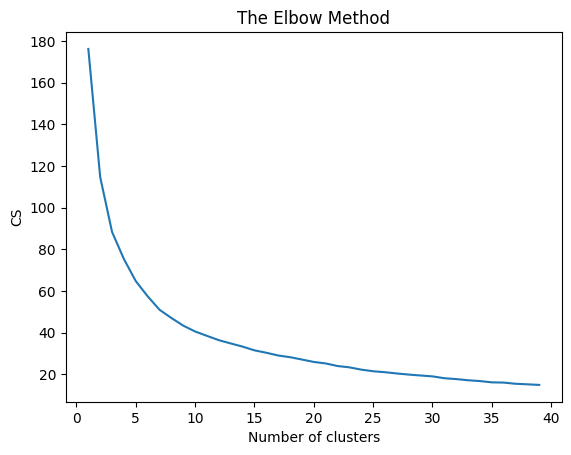

In [51]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 40):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 40), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

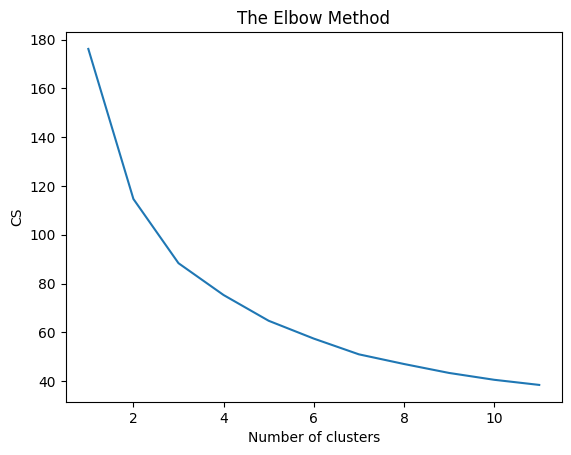

In [52]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 12):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 12), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

individual k mean

In [71]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0) 

kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [72]:
labels=kmeans.labels_
pd.DataFrame(labels).to_csv('jm_aug_l')
print(labels)

[2 1 2 1 1 1 2 2 1 2 2 2 1 1 2 2 2 2 2 2 2 1 1 1 1 1 2 2 1 1 1 1 2 2 2 2 1
 1 2 1 1 2 2 1 2 1 1 2 1 2 2 1 1 1 2 1 2 2 2 1 1 2 2 2 1 2 2 2 2 2 1 1 2 1
 2 1 1 2 2 1 2 2 2 1 2 1 1 1 1 1 1 1 2 2 2 2 3 1 1 1 1 1 1 4 2 1 4 2 2 2 2
 2 2 1 1 1 3 1 1 1 2 2 2 2 2 2 3 2 2 1 1 1 2 2 2 2 2 2 2 2 1 1 1 3 2 2 3 4
 3 3 2 2 3 3 3 2 2 2 1 2 2 4 2 2 2 3 3 3 3 3 3 2 2 3 3 3 2 4 2 1 2 4 4 3 3
 2 2 3 3 2 2 2 2 2 2 2 2 2 2 1 2 3 2 2 2 2 2 4 3 3 0 4 2 3 3 3 3 4 3 3 4 4
 3 3 0 4 4 4 3 3 0 2 2 2 3 2 3 3 3 3 2 4 3 3 3 2 3 3 2 4 3 3 3 4 4 3 0 3 0
 3 4 3 3 4 3 0 4 4 2 0 0 3 4 4 3 0 4 4 3 4 0 3 4 3 2 3 0 3 4 4 3 4 4 4 4 0
 0 4 3 0 0 0 0 0 2 2 2 2 2 4 1 3 3 1 1 3 2 2 3 4 2 3 4 2 2 3 1 1 2 1 1 1 2
 1 1 1 1 1 1 1 3 4 3 4 4 1 3 2 2 2 3 4 3 3 2 1 4 2 2 1 1 1 1 1 2 1 2 4 2 2
 3 3 4 1 4 4 4 1 3 1 3 4 4 3 2 1 3 4 3 1 4 4 4 1 1 1 1 4 3 3 4 4 2 2 1 2 1
 2 1 1 2 2 1 1 1 1 1 2 3 4 1 1 1 2 2 2 4 1 1 1 1 1 2 1 1 2 1 2 4 4 0 1 1 4
 3 1 1 3 3 3 1 2 2 1 1 0 2 1 1 2 1 1 1 1 2 2 1 1 1 1 1 1 2 2 1 2 1 1 1 1 1
 1 2 2 3 4 1 1 4 4 3 3 1 

In [73]:
Z=kmeans.cluster_centers_
Z

array([[0.6993383 , 0.7625831 , 0.66195709, 0.53421089, 0.45777778],
       [0.08520798, 0.1079922 , 0.04049409, 0.23869969, 0.3797193 ],
       [0.46345766, 0.09652076, 0.49802876, 0.20266164, 0.25098485],
       [0.2115406 , 0.42443593, 0.13173821, 0.43890835, 0.43264368],
       [0.59892312, 0.23257189, 0.46437737, 0.49005732, 0.59057884]])

[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.003s...
[t-SNE] Computed neighbors for 717 samples in 0.049s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.189881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 51.991241
[t-SNE] KL divergence after 1200 iterations: 0.187013


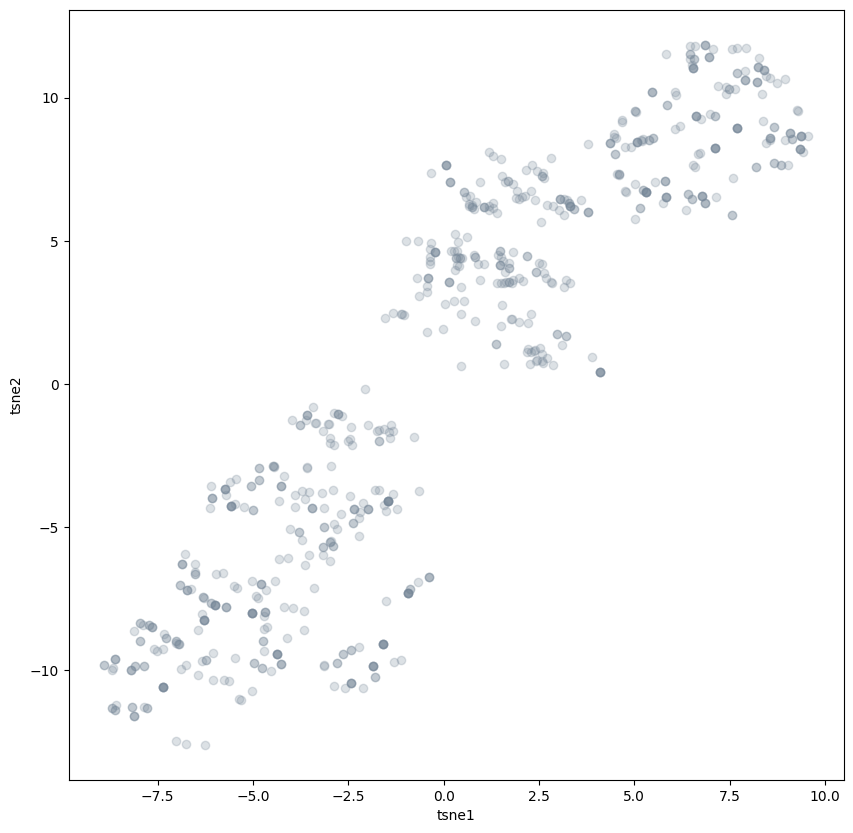

In [74]:

tsne = TSNE(n_components=3, verbose=1, perplexity=80, n_iter=5000, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2', 'tsne3'])
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, facecolor='lightslategray')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [75]:
import matplotlib

In [76]:
tsne = TSNE(n_components=2, verbose=1, perplexity=80, n_iter=2500, learning_rate=200)
tsne_scale_results = tsne.fit_transform(X)
tsne_df_scale = pd.DataFrame(tsne_scale_results, columns=['tsne1', 'tsne2'])


[t-SNE] Computing 241 nearest neighbors...
[t-SNE] Indexed 717 samples in 0.001s...
[t-SNE] Computed neighbors for 717 samples in 0.035s...
[t-SNE] Computed conditional probabilities for sample 717 / 717
[t-SNE] Mean sigma: 0.189881
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.389233
[t-SNE] KL divergence after 1650 iterations: 0.265058


In [77]:
np.unique(labels)


array([0, 1, 2, 3, 4], dtype=int32)

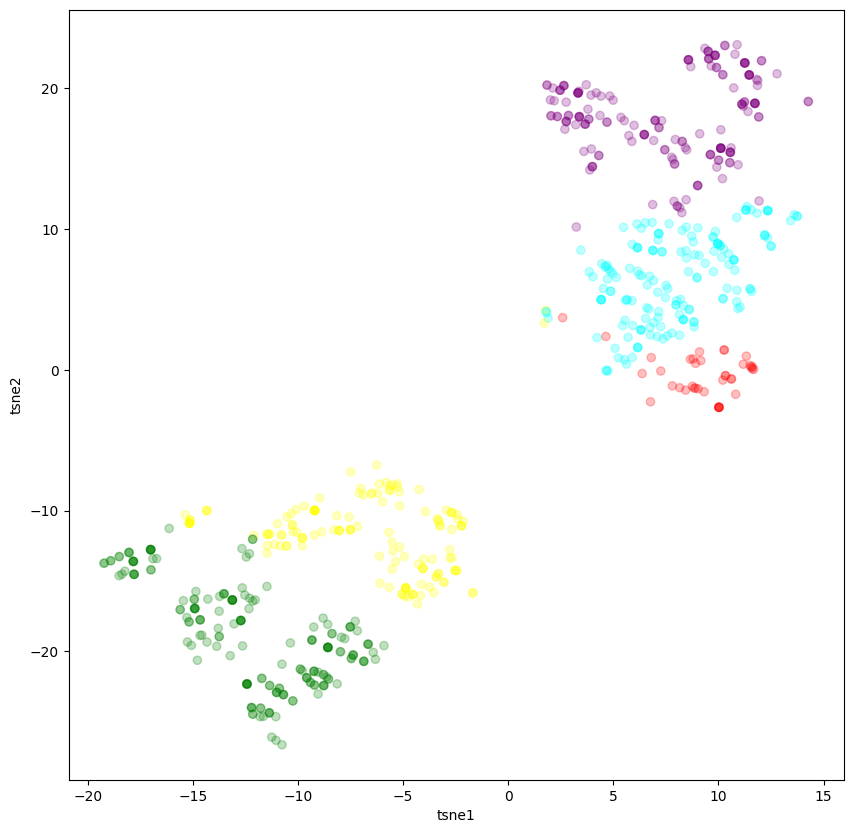

In [78]:
colors = ["red","green","blue","purple","yellow","cyan"]
plt.figure(figsize = (10,10))
plt.scatter(tsne_df_scale.iloc[:,0],tsne_df_scale.iloc[:,1],alpha=0.25, c=labels, cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

Reverse Scaling

In [79]:
Z2 = ms.inverse_transform(Z)
pd.DataFrame(Z2).to_csv('cc_jm_aug')
Z2

array([[225.43589744,  97.76923077,  91.87179487, 154.8974359 ,
         34.33333333],
       [ 73.13157895,  44.74736842,  30.96842105,  99.63684211,
         28.47894737],
       [166.9375    ,  43.81818182,  75.80681818,  92.89772727,
         18.82386364],
       [104.46206897,  70.37931034,  39.91034483, 137.07586207,
         32.44827586],
       [200.53293413,  54.83832335,  72.50898204, 146.64071856,
         44.29341317]])